<a href="https://colab.research.google.com/github/t-pham1/Applying-ML-to-Predict-Coronary-Heart-Disease/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>Applying ML to Predict Coronary Heart Disease</center></h1>
## <h2><center>Tommy Pham</center></h2>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [ ]:
patient_df = pd.read_csv('patient_data.csv')
patient_df.head()

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


**DATA INFO**
* sbp - Systolic blood pressure
* tobacco - Cumulative tobacco (kg)
* ldl - Low density lipoprotein cholesterol
* adiposity - Fatty tissue in the body
* famhist - Family history of heart disease, a factor with levels “Absent” and “Present”
* typea - Type-A behavior
* obesity - BMI
* alcohol - Current alcohol consumption
* age - Age at onset
* chd - Response, coronary heart disease (0 if absent, 1 if present)

**VARIABLES TO REMOVE**
* ind - Pandas already records the index
* typea - Not a relevant risk factor for coronary heart disease

In [ ]:
patient_df = patient_df.drop('ind', axis = 'columns')
patient_df = patient_df.drop('typea', axis = 'columns')
patient_df.head()

,sbp,tobacco,ldl,adiposity,famhist,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,25.99,57.34,49,1


In [ ]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   obesity    462 non-null    float64
 6   alcohol    462 non-null    float64
 7   age        462 non-null    int64  
 8   chd        462 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 32.6+ KB


* No missing values were found in the data

## Visualizations

### Countplot representing number of patients with or without chd

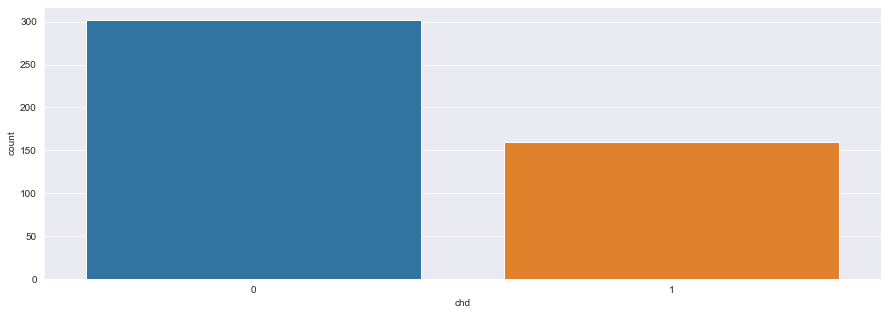

In [ ]:
sns.countplot(x=patient_df['chd'])
plt.show()

### Boxplots of continuous variables
* sbp
* tobacco
* ldl
* adiposity
* obesity
* alcohol
* age

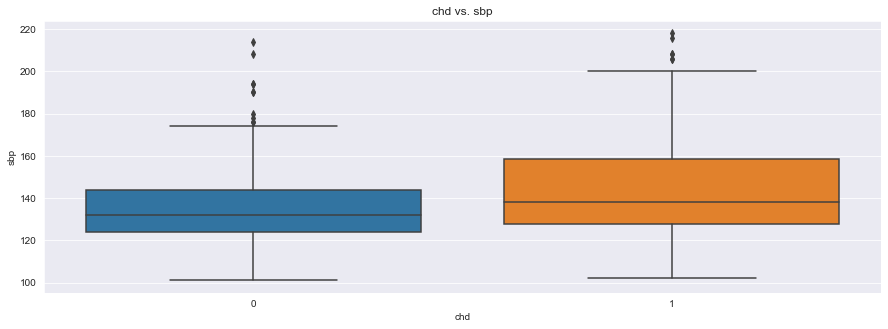

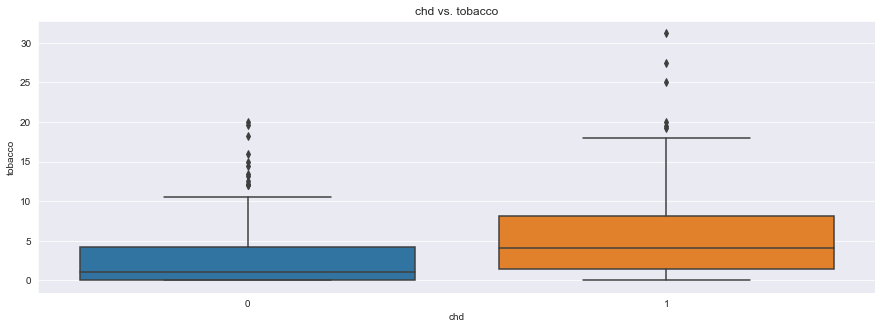

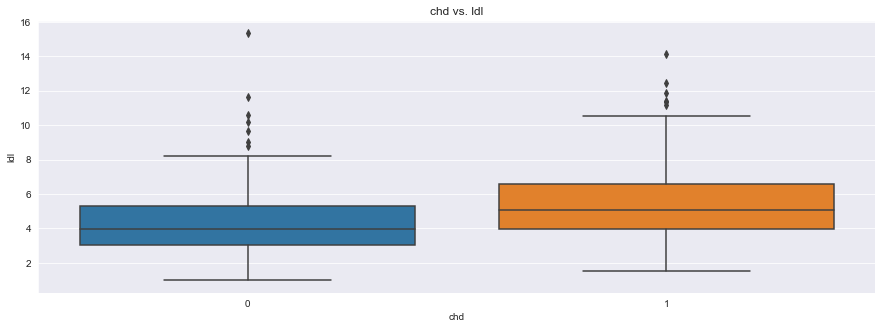

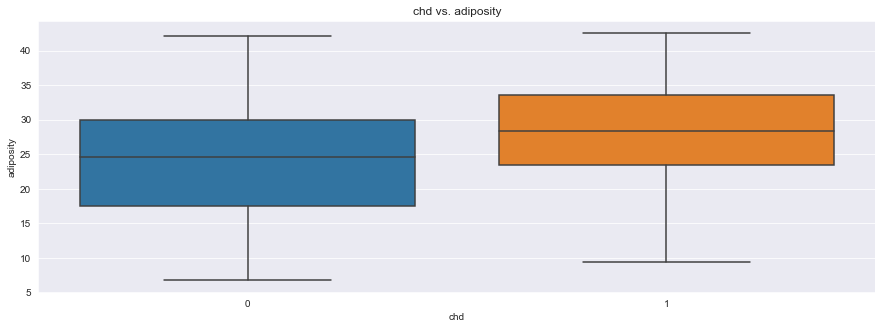

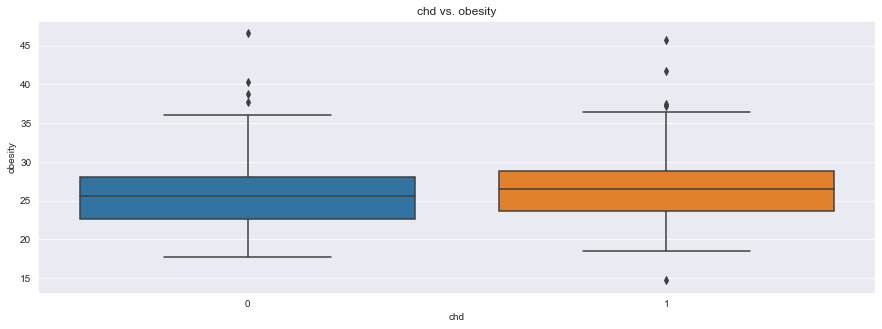

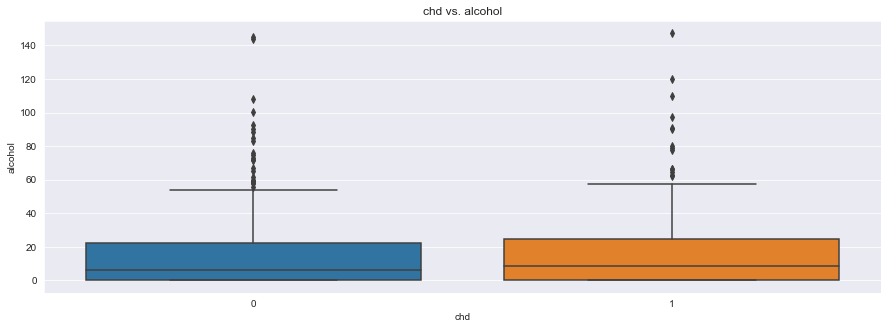

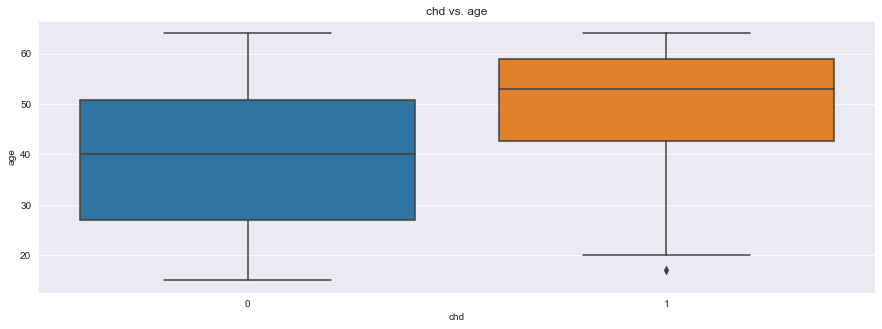

In [ ]:
sns.boxplot(x=patient_df['chd'], y=patient_df['sbp'])
plt.title('chd vs. sbp')
plt.show()

sns.boxplot(x=patient_df['chd'], y=patient_df['tobacco'])
plt.title('chd vs. tobacco')
plt.show()

sns.boxplot(x=patient_df['chd'], y=patient_df['ldl'])
plt.title('chd vs. ldl')
plt.show()

sns.boxplot(x=patient_df['chd'], y=patient_df['adiposity'])
plt.title('chd vs. adiposity')
plt.show()

sns.boxplot(x=patient_df['chd'], y=patient_df['obesity'])
plt.title('chd vs. obesity')
plt.show()

sns.boxplot(x=patient_df['chd'], y=patient_df['alcohol'])
plt.title('chd vs. alcohol')
plt.show()

sns.boxplot(x=patient_df['chd'], y=patient_df['age'])
plt.title('chd vs. age')
plt.show()

**SBP**
* The distribution of sbp for the group that has heart disease appears to be wider compared to the group that does not have heart disease.
* We can see a fair number of outliers for both groups.
* Both groups share an approximately equal median sbp value.
* The IQR for the group that has heart disease is wider compared to the group that does not.

**TOBACCO**
* The distribution of tobacco for the group that has heart disease appears to be wider compared to the group that does not have heart disease.
* We can spot a fair number of outliers on both groups.
* The median value for the group that does not have heart disease is lower than the group that does have heart disease.
* On average, we can see that the levels of cumulative tobacco for the group that does not have heart disease is lower than the group that has heart disease.

**LDL**
* The distribution of ldl appears to be wider for the group that has heart disease.
* The IQR for both groups appears to be roughly equal.
* On average, the group having no heart disease appears have lower levels of ldl.
* There are a fair number of outliers spotted on both groups.
* The median appears to be higher in the group that has heart disease.

**ALCOHOL**
* For both groups, we can see that we have a roughly equal minimum, median, and maximum (the distribution appears to be equal).
* We can observe numerous outliers when comparing groups’ alcohol levels.
* Surprisingly, there appears to be no meaningful difference when comparing the groups’ alcohol levels.

**ADIPOSITY**
* On average, the levels of adiposity for the group that has heart disease is higher than the group that does not have heart disease.
* The distribution of adiposity amongst the groups share roughly equal minimum and maximum values.
* The IQR is greater for the group that does not have heart disease.
* The median adiposity value for the group that has heart disease is greater than the group that does not have heart disease.

**OBESITY**
* The distribution of obesity for both groups appears to be roughly equal.
* The IQR appears to be roughly the same amongst the groups.
* There appears to be a few outliers in both groups.
* The median values for both groups also appear to be roughly equal.
* Surprisingly, there appears to be little to no difference in obesity levels amongst the groups.

**AGE**
* It can be observed that on average, older people are more at risk of contracting heart disease.
* The distribution of people having heart disease is wide, but it can be observed that the observations are highly concentrated at higher ages.
* One outlier can be observed in the group that has heart disease and it appears to be the minimum value.

### Distribution plots of continuous variables

<AxesSubplot:title={'center':'age Distribution by chd'}, ylabel='Density'>

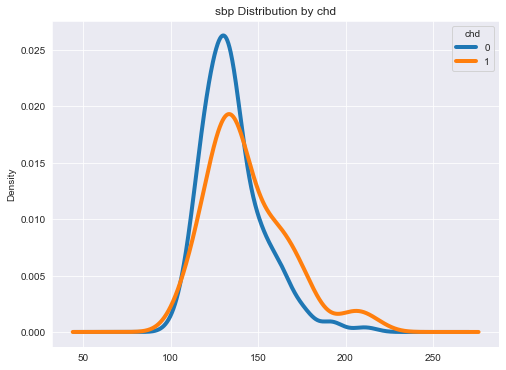

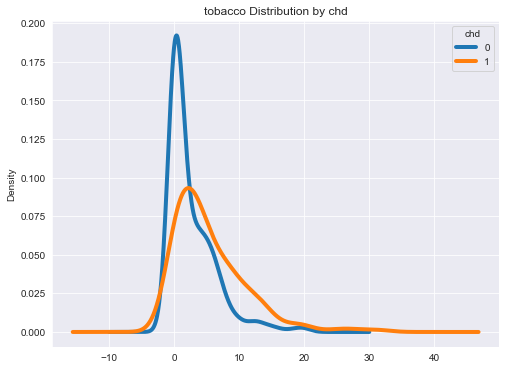

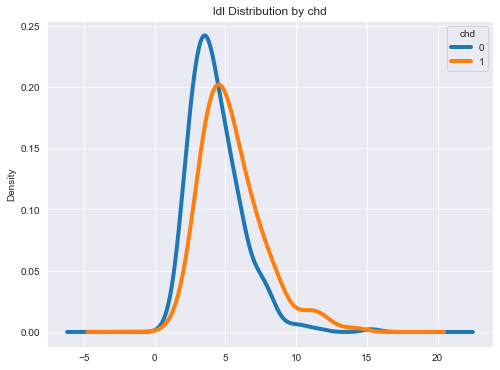

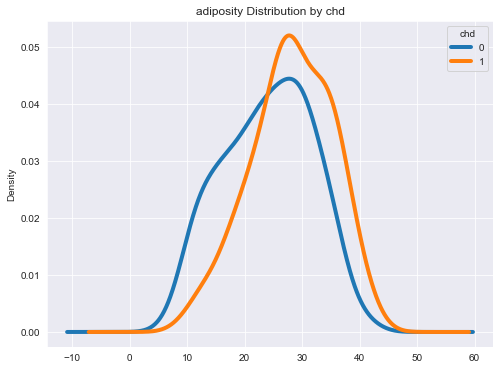

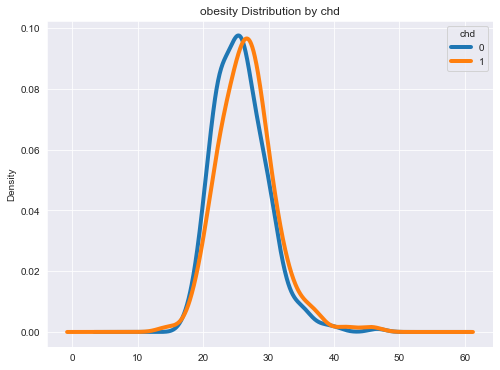

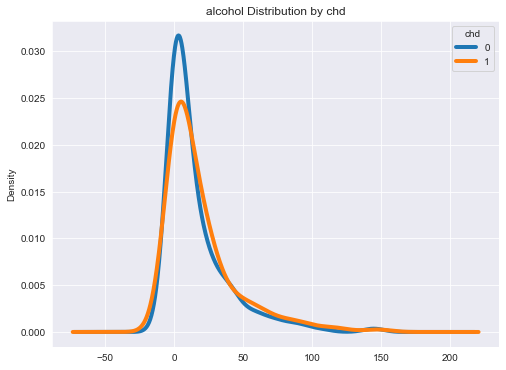

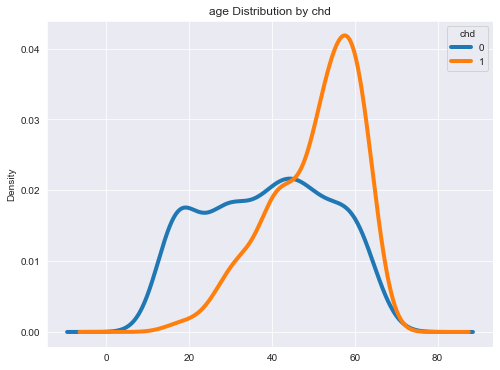

In [ ]:
sbp_wide = patient_df.pivot(columns='chd', values='sbp')
sbp_wide.plot.kde(figsize=(8, 6), linewidth=4, title='sbp Distribution by chd')

tobacco_wide = patient_df.pivot(columns='chd', values='tobacco')
tobacco_wide.plot.kde(figsize=(8, 6), linewidth=4, title='tobacco Distribution by chd')

ldl_wide = patient_df.pivot(columns='chd', values='ldl')
ldl_wide.plot.kde(figsize=(8, 6), linewidth=4, title='ldl Distribution by chd')

adiposity_wide = patient_df.pivot(columns='chd', values='adiposity')
adiposity_wide.plot.kde(figsize=(8, 6), linewidth=4, title='adiposity Distribution by chd')

obesity_wide = patient_df.pivot(columns='chd', values='obesity')
obesity_wide.plot.kde(figsize=(8, 6), linewidth=4, title='obesity Distribution by chd')

alcohol_wide = patient_df.pivot(columns='chd', values='alcohol')
alcohol_wide.plot.kde(figsize=(8, 6), linewidth=4, title='alcohol Distribution by chd')

age_wide = patient_df.pivot(columns='chd', values='age')
age_wide.plot.kde(figsize=(8, 6), linewidth=4, title='age Distribution by chd')

**SBP**
* On average, SBP appears to be slightly greater for the group having heart disease
* Both heavily concentrated around the same range
* Slight hill at higher value for class 1

**LDL**
* Both groups share a similar type of distribution
* LDL value slightly higher on average for the group having heart disease

**ALCOHOL**
* Both groups share a very similar right-skewed distribution
* Little to no difference between the groups

**ALL OF THE ABOVE 3 SHARE UNIMODAL DISTRIBUTIONS**
**TOBACCO:**
* More use of tobacco for class with heart disease.
* Unimodal Distributions

**OBESITY:**
* Slightly higher obesity levels for heart disease.
* Peak at around same range
* Unimodal dist.

**AGE:**
* Multimodal distribution for group with no heart disease and unimodal for the other
* Higher ages signify more risk for heart disease

**ADIPOSITY:**
* Higher adiposity levels for group with heart disease.
* Both appear to have unimodal distributions

### Pie plot of CHD vs. FAMHIST

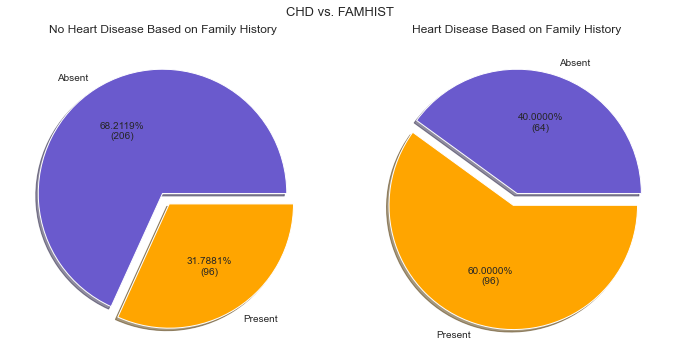

In [ ]:
def my_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
labels = patient_df['famhist'].value_counts().index
query = patient_df.query('chd==0').groupby(patient_df['famhist'])['famhist'].count()
total = query.sum()
axes[0].pie(query, colors=['slateblue', 'orange'], labels=labels, autopct=my_fmt, shadow=True, explode=(0,0.1))
axes[0].set_title("No Heart Disease Based on Family History")
query = patient_df.query('chd==1').groupby(patient_df['famhist'])['famhist'].count()
total = query.sum()
axes[1].pie(query, colors=['slateblue', 'orange'], labels=labels, autopct=my_fmt, shadow=True, explode=(0,0.1))
axes[1].set_title("Heart Disease Based on Family History")
plt.suptitle('CHD vs. FAMHIST', fontsize=13)
plt.tight_layout(h_pad=2)
plt.show()

* For the group that does not have heart disease, we can see that in the family history there are no cases of heart disease in the majority.
* However, for the group that does have heart disease. The majority had family history that suffered of heart disease.
* In conclusion, heart disease and family history show strong correlation.

### Heatmap

Text(0.5, 1.0, 'Correlation Matrix')

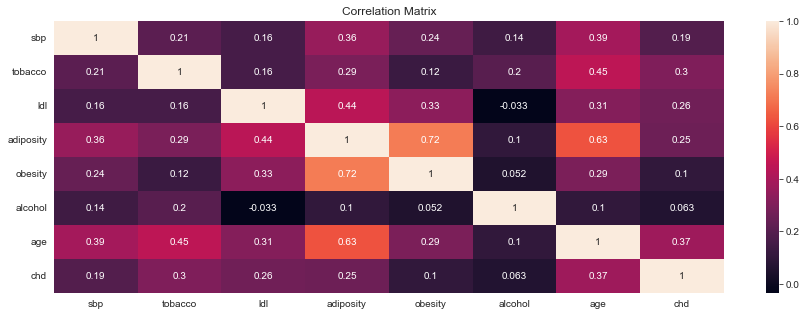

In [ ]:
sns.heatmap(patient_df.corr(), annot=True)
plt.title('Correlation Matrix')

**RELATIONSHIPS**

**Strong**
* Adiposity vs obesity

**Medium**
* Adiposity vs age

**Weak**
* tobacco vs age
* sbp vs. age
* sbp vs. adiposity
* ldl vs. adiposity
* chd vs. age
* adiposity vs tobacco

## Preprocessing

In [ ]:
famhist = {"famhist": {"Present": 1, "Absent": 0}}
patient_df = patient_df.replace(famhist)
patient_df.head()

,sbp,tobacco,ldl,adiposity,famhist,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,25.99,57.34,49,1


In [ ]:
X = patient_df[['sbp', 'tobacco', 'ldl', 'adiposity', 'obesity', 'alcohol', 'age','famhist']]
y = patient_df['chd']

### Spitting the data into training and testing sets and scaling it

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model creation

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Logistic regression model accuracy score: ",round(accuracy_score(y_test, predictions),2))
print('Training set score: {:.2f}'.format(logmodel.score(x_train, y_train)))

[[85 14]
 [21 19]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.58      0.47      0.52        40

    accuracy                           0.75       139
   macro avg       0.69      0.67      0.67       139
weighted avg       0.74      0.75      0.74       139

Logistic regression model accuracy score:  0.75
Training set score: 0.72


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

# testing k values from 1-14
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

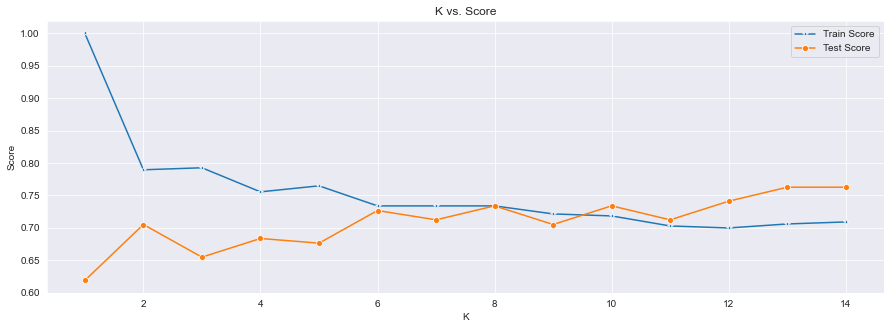

In [ ]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

* K = 9 appears to be the best

In [ ]:
knn = KNeighborsClassifier(9)

knn.fit(x_train,y_train)
print("Score is: ",knn.score(x_test,y_test))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Score is:  0.7050359712230215
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.48      0.40      0.44        40

    accuracy                           0.71       139
   macro avg       0.63      0.61      0.62       139
weighted avg       0.69      0.71      0.70       139

[[82 17]
 [24 16]]


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, rfc_pred)))
print('Training set score: {:.4f}'.format(rfc.score(x_train, y_train)))

Model accuracy score: 0.7626
Training set score: 0.7802


## Cross Validation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


models = [logmodel, knn, rfc]
model_names = ['Logistic Regression Model', 'KNN Model', 'Random Forest Model']

idx = 0
for model in models:
    pipeline = Pipeline([('transformer', scaler), ('estimator', model)])
    cv = KFold(n_splits=10, shuffle=True, random_state=90)
    scores = cross_val_score(pipeline, X,y, cv=cv, scoring='accuracy')
    print("CV Score for " + model_names[idx] +": ", np.mean(scores))
    idx+=1

CV Score for Logistic Regression Model:  0.7139222941720629
CV Score for KNN Model:  0.6836725254394078
CV Score for Random Forest Model:  0.6965309898242368


## CONCLUSIONS

* Overall, the best model for our data was the logistic regression model while KNN was the worst.
* The following predictors seem to majorly contribute whether a person has heart disease or not in western cape: Family history, tobacco use, age, adiposity, ldl
* Family history does contribute
* The excess use of tobacco contributes. However, alcohol seems to have very little effect.